<a href="https://colab.research.google.com/github/Thoyyi01/Assignments/blob/main/insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df=pd.read_csv('/content/Claimants_Data.csv')

In [6]:
df.shape

(100156, 13)

<h3>Finding Null values</h3>

In [7]:
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [8]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


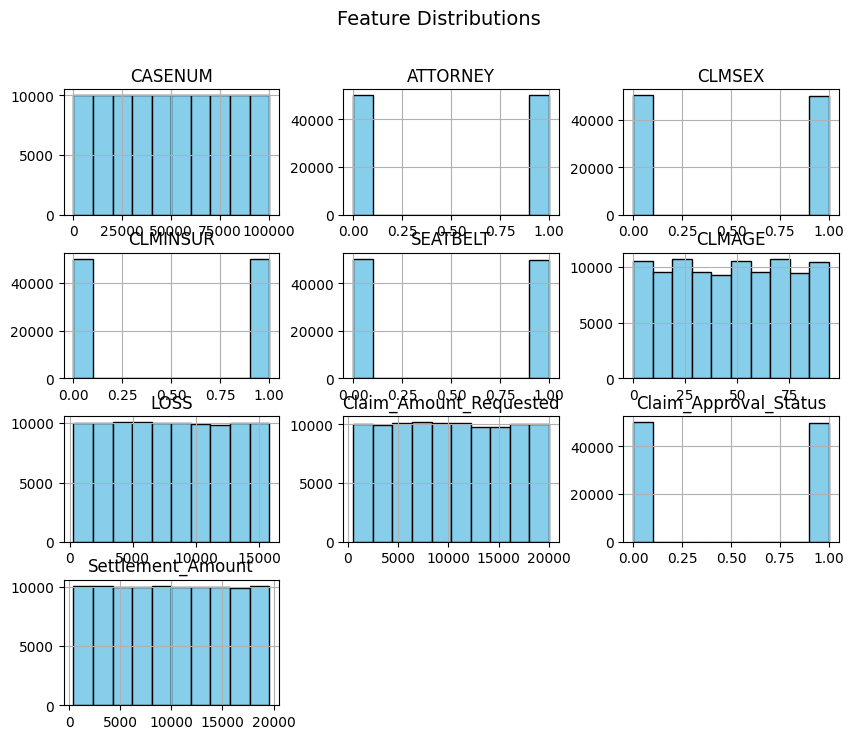

ValueError: could not convert string to float: 'Moderate'

<Figure size 600x500 with 0 Axes>

In [11]:
def plot_distributions(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols].hist(figsize=(10, 8), bins=10, color='skyblue', edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=14)
    plt.show()

plot_distributions(df)

# Check correlations
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()

<h3>Here we need to Label encode the Accident, policy_Type and Driving Records</h3>

In [34]:
label=LabelEncoder()
df['Accident_Severity']=label.fit_transform(df['Accident_Severity'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])
df['Policy_Type']=label.fit_transform(df['Policy_Type'])
df['CLMAGE']=label.fit_transform(df['CLMAGE'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])


In [19]:
scaler = StandardScaler()
df[['LOSS','CLMAGE','Settlement_Amount','Driving_Record',"Claim_Amount_Requested"]] = scaler.fit_transform(df[['LOSS','CLMAGE','Settlement_Amount','Driving_Record','Claim_Amount_Requested']])
df.head()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,-1.714248,0.103870,1,0.501756,1,0.075005,0,1.215003
1,2,0,1.0,0.0,1.0,-1.020862,-1.245499,1,-1.071469,1,1.187638,0,-1.235062
2,3,1,0.0,0.0,1.0,0.803838,1.700429,2,-0.508829,0,1.453387,1,1.215003
3,4,1,0.0,0.0,1.0,-0.473452,0.284251,1,-1.645343,0,-0.571018,0,1.215003
4,5,1,1.0,1.0,0.0,-1.641260,-1.647823,2,0.428871,0,1.533810,1,1.215003


<h3>here we removing the rows where Age is less than  18 years</h3>

In [20]:
df = df[df['CLMAGE'] >= 18]

<h3>Here we converted from String to numbers And we need To Find outliers in Claim_Amount_Requested  </h3>

In [21]:
Q1 = df['Settlement_Amount'].quantile(0.25)
Q3 = df['Settlement_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df[(df['Settlement_Amount'] < lower_bound)]
outliers2

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [22]:
Q1 = df['Claim_Amount_Requested'].quantile(0.25)
Q3 = df['Claim_Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Claim_Amount_Requested'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [23]:
Q1 = df['CLMAGE'].quantile(0.25)
Q3 = df['CLMAGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CLMAGE'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [24]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [25]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


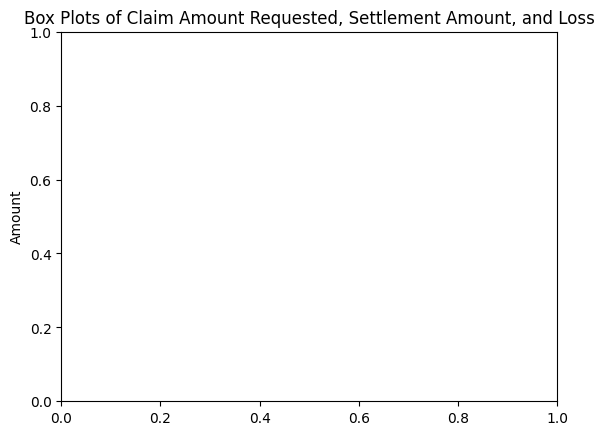

In [26]:
sns.boxplot(data=df[['Claim_Amount_Requested', 'Settlement_Amount', 'LOSS']])
plt.title('Box Plots of Claim Amount Requested, Settlement Amount, and Loss')
plt.ylabel('Amount')
plt.show()

<h3> Here we Don't have any outliers here</h3>

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


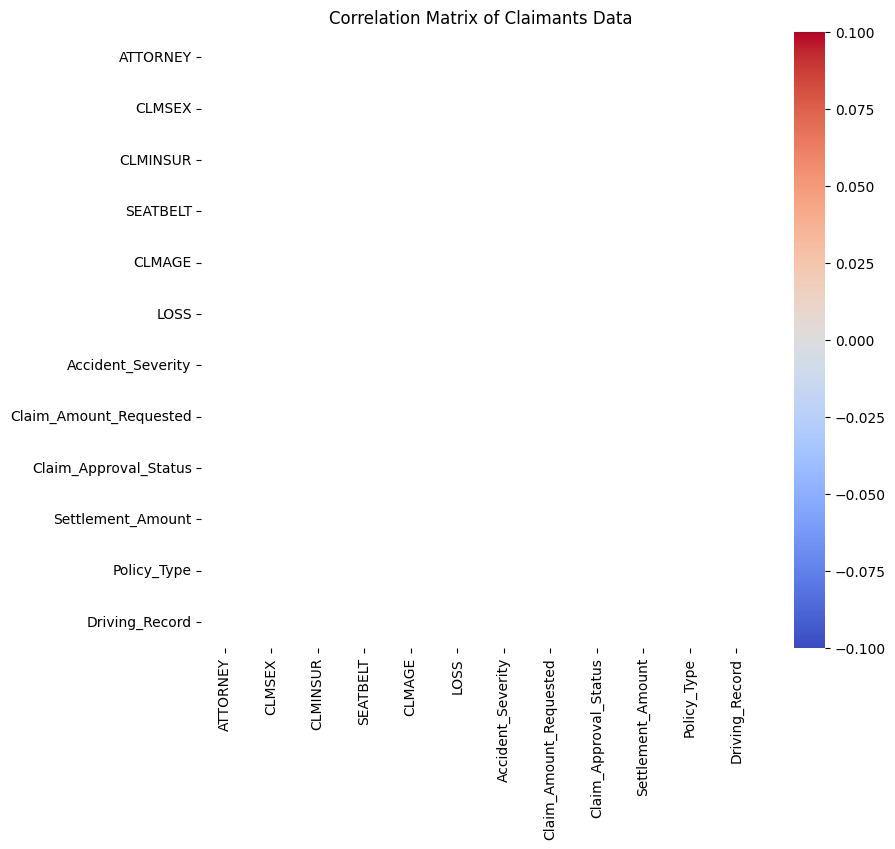

In [27]:
DATA = df.drop('CASENUM',axis=1)
plt.figure(figsize=(9, 8))
sns.heatmap(DATA.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Claimants Data')
plt.show()

In [28]:

X = df.drop(['ATTORNEY', 'Settlement_Amount'], axis=1)
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
conf_matrix_dt


NameError: name 'X_train' is not defined

In [13]:
import statsmodels.formula.api as smf
model = smf.ols('ATTORNEY ~ Claim_Amount_Requested + Settlement_Amount + CLMAGE + Accident_Severity',data=df). fit()

In [14]:
(model.rsquared,model.rsquared_adj)

(np.float64(3.0679646740194855e-05), np.float64(-1.9243933906620825e-05))

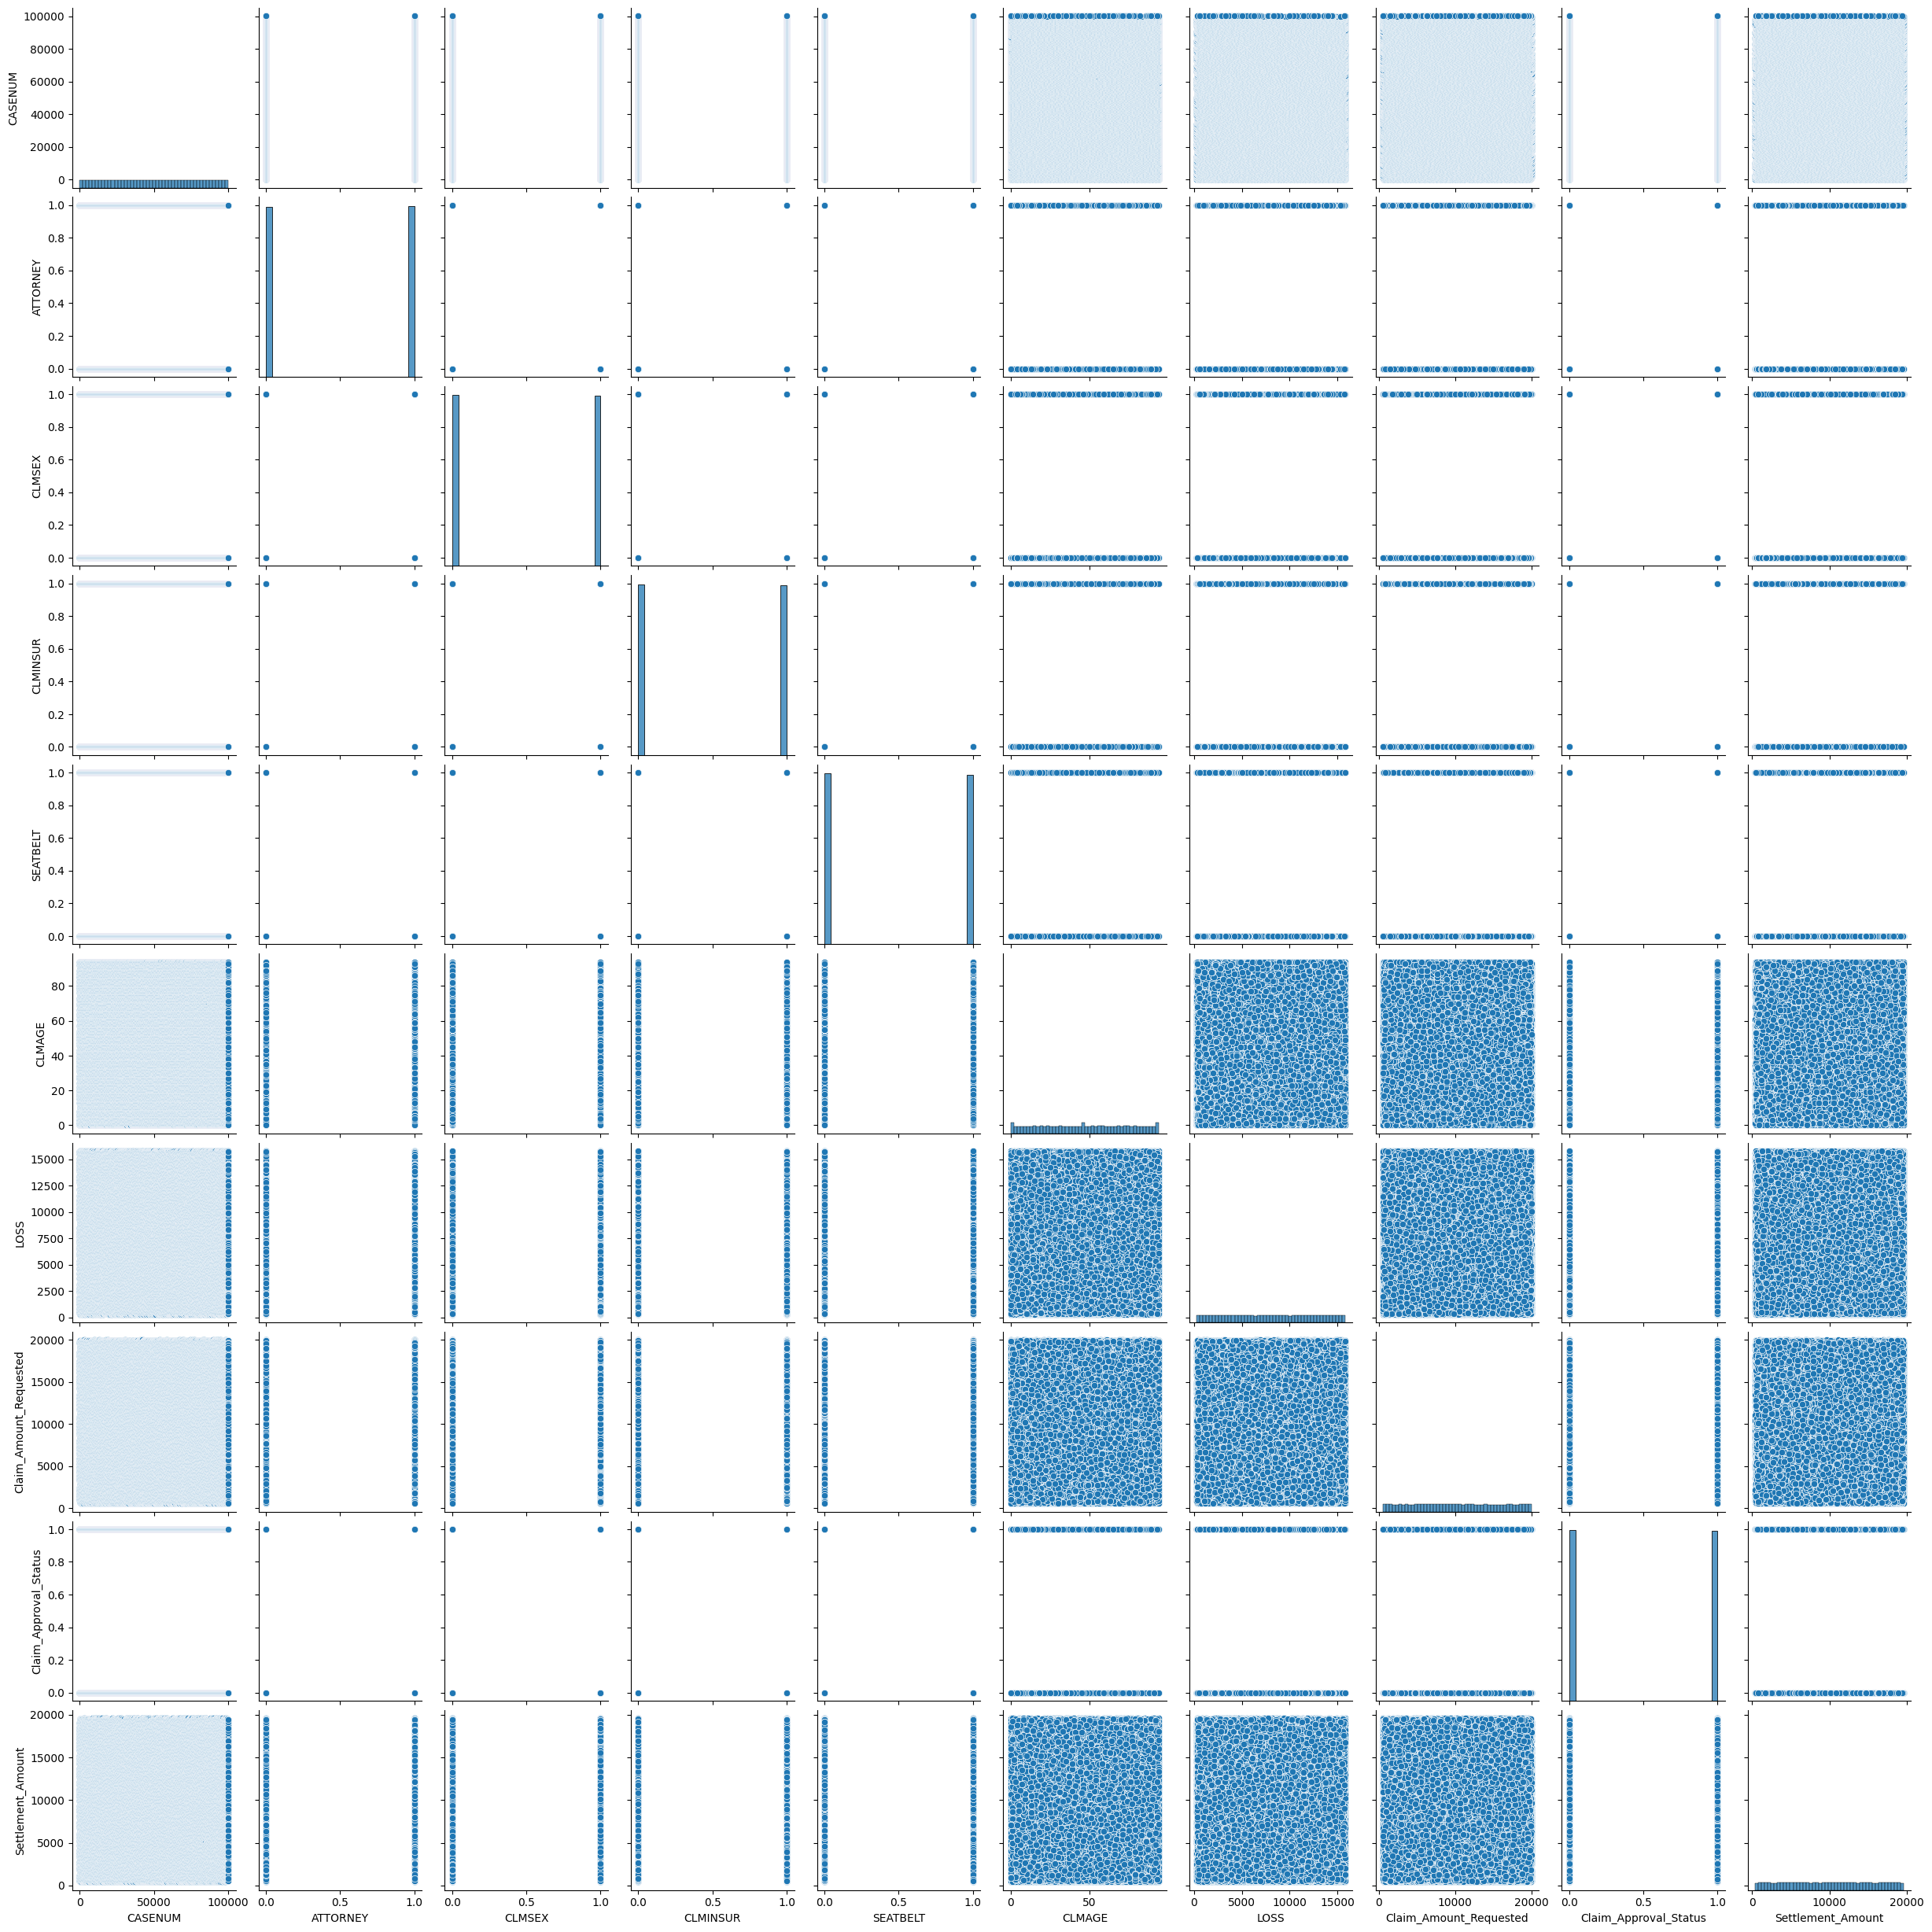

In [12]:
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
sns.pairplot(df)

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ATTORNEY'])  # Replace 'target' with the actual target column
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.columns)  # Check if 'Category' exists


X_train['Category'] = label.fit_transform(X_train['Category'])
X_test['Category'] = label.transform(X_test['Category'])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [40]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Minor'